In [34]:
# Importing all the required modules, library & package
# 1)pandas for data cleaning and manipulation,data procesing, CSV file I/O (e.g.  pd.cdv_csv)
# 2)numpy for linear algebra,
# 3)matplotlib and seaborn for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Read file for covid-varients and checking the data set for data cleaning and other information

df = pd.read_csv("covid-variants.csv")

print(df)
# how many types of varients nad counties most affected and which variented most affected

        location        date         variant  num_sequences  perc_sequences  \
0         Angola  2020-07-06           Alpha              0             0.0   
1         Angola  2020-07-06       B.1.1.277              0             0.0   
2         Angola  2020-07-06       B.1.1.302              0             0.0   
3         Angola  2020-07-06       B.1.1.519              0             0.0   
4         Angola  2020-07-06         B.1.160              0             0.0   
...          ...         ...             ...            ...             ...   
100411  Zimbabwe  2021-11-01         Omicron              0             0.0   
100412  Zimbabwe  2021-11-01   S:677H.Robin1              0             0.0   
100413  Zimbabwe  2021-11-01  S:677P.Pelican              0             0.0   
100414  Zimbabwe  2021-11-01          others              0             0.0   
100415  Zimbabwe  2021-11-01         non_who              0             0.0   

        num_sequences_total  
0                    

In [36]:
df_covid=pd.DataFrame(df)

In [37]:
#checking size of data set
print(f"Size of the datset is {df_covid.shape}")

Size of the datset is (100416, 6)


In [38]:
# Let's see some records,how does it look like

df_covid.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [39]:
# Lets see some records, how does it look like
df_covid.tail()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [40]:
# Lets check the inforamtion of the dataset

df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [41]:
# from the data set reading and from the information that got know that date dtype is 'object' so that need to convert "date" column from string to 'datetime' 

df_covid['date']=pd.to_datetime(df_covid['date'])


In [42]:
# lets check the small info of the dataset after converting data column from string to datetime Dtype.
# here below from checking info we can see that date column data type is changed to datetime from above code.

df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   location             100416 non-null  object        
 1   date                 100416 non-null  datetime64[ns]
 2   variant              100416 non-null  object        
 3   num_sequences        100416 non-null  int64         
 4   perc_sequences       100416 non-null  float64       
 5   num_sequences_total  100416 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [ ]:
#Checking Null and missing value in data set

df_covid.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

In [43]:
# checking description of the data

df_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
num_sequences,100416.0,72.171676,1669.262169,0.00,0.0,0.0,0.0,142280.0
perc_sequences,100416.0,6.154355,21.898989,-0.01,0.0,0.0,0.0,100.0
num_sequences_total,100416.0,1509.582457,8445.291772,1.00,12.0,59.0,394.0,146170.0


In [ ]:
# finding and checking for unique value in dataset

print(f"Countries number: {df_covid.location.nunique()}")
print(f"Date number: {df_covid.date.nunique()}")
print(f"Variants number: {df_covid.variant.nunique()}")
print(f"Variants names:\n \n {df_covid.variant.unique()}")


Countries number: 121
Date number: 45
Variants number: 24
Variants names:
 
 ['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'others' 'non_who']


In [ ]:
# list and number of countries whose data is included in the file
 
print(f" List of the Countries data available in data set: \n \n {df_covid.location.unique()}")

 List of the Countries data available in data set: 
 
 ['Angola' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Belize' 'Benin' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'North Macedonia' 'Norway' 'Oman' 'Pakistan' 'Papua New Guinea'
 'Paraguay' 'Peru' 'Philippines

In [ ]:
# the range from when the data is avialable from where and which variant
first_date=pd.to_datetime(df_covid['date']).min()
last_date=pd.to_datetime(df_covid['date']).max()
print(f"First case registerd on {first_date} at {df_covid['location'][pd.to_datetime(df_covid['date']).idxmin()]},Varient:{df_covid['variant'][pd.to_datetime(df_covid['date']).idxmin()]} ")
print(f"last case registerd on {last_date} at {df_covid['location'][pd.to_datetime(df_covid['date']).idxmax()]},Varient:{df_covid['variant'][pd.to_datetime(df_covid['date']).idxmax()]} ")

First case registerd on 2020-05-11 00:00:00 at Argentina,Varient:Alpha 
last case registerd on 2022-01-05 00:00:00 at Bangladesh,Varient:Alpha 


In [44]:
i=df_covid.where(df_covid['location']=='India')
i.dropna(inplace=True)
i['date']=pd.to_datetime(i['date'])
i.head(5)


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
36360,India,2020-05-11,Alpha,0.0,0.0,471.0
36361,India,2020-05-11,B.1.1.277,0.0,0.0,471.0
36362,India,2020-05-11,B.1.1.302,0.0,0.0,471.0
36363,India,2020-05-11,B.1.1.519,0.0,0.0,471.0
36364,India,2020-05-11,B.1.160,0.0,0.0,471.0


In [ ]:
# the range from when the data is avialable from india and which variant
first_date=pd.to_datetime(i['date']).min()
last_date=pd.to_datetime(i['date']).max()
print(f"First case registerd on {first_date} at {i['location'][pd.to_datetime(i['date']).idxmin()]},Varient:{i['variant'][pd.to_datetime(i['date']).idxmin()]} ")
print(f"last case registerd on {last_date} at {i['location'][pd.to_datetime(i['date']).idxmax()]},Varient:{i['variant'][pd.to_datetime(i['date']).idxmax()]} ")


First case registerd on 2020-05-11 00:00:00 at India,Varient:Alpha 
last case registerd on 2021-12-27 00:00:00 at India,Varient:Alpha 


In [ ]:
place=df_covid.location.unique()
num_sequence=[]
num_total=[]
for j in place:
  x=df_covid[df_covid.location.values == j]
  num_seq=sum(x.num_sequences)
  num_tot=sum(x.num_sequences_total)
  num_sequence.append(num_seq)
  num_total.append(num_tot)

covid_location=pd.DataFrame({"location" :place,"num_sequences_processed":num_sequence,"acknowledg_num_sequences_total":num_total})
covid_location  

,location,num_sequences_processed,acknowledg_num_sequences_total
0,Angola,1325,25320
1,Argentina,10689,201864
2,Aruba,3302,72000
3,Australia,62668,1132776
4,Austria,14627,301920
...,...,...,...
116,United States,2420758,49960248
117,Uruguay,1189,16368
118,Vietnam,1811,43320
119,Zambia,1565,26808


In [ ]:
df_covid.groupby(['location']).sum()

,num_sequences,perc_sequences,num_sequences_total
location,,,
Angola,1325,3507.65,25320
Argentina,10689,6837.93,201864
Aruba,3302,3002.21,72000
Australia,62668,6502.24,1132776
Austria,14627,6356.05,301920
...,...,...,...
United States,2420758,6738.15,49960248
Uruguay,1189,4592.69,16368
Vietnam,1811,2350.00,43320


<function matplotlib.pyplot.show(*args, **kw)>

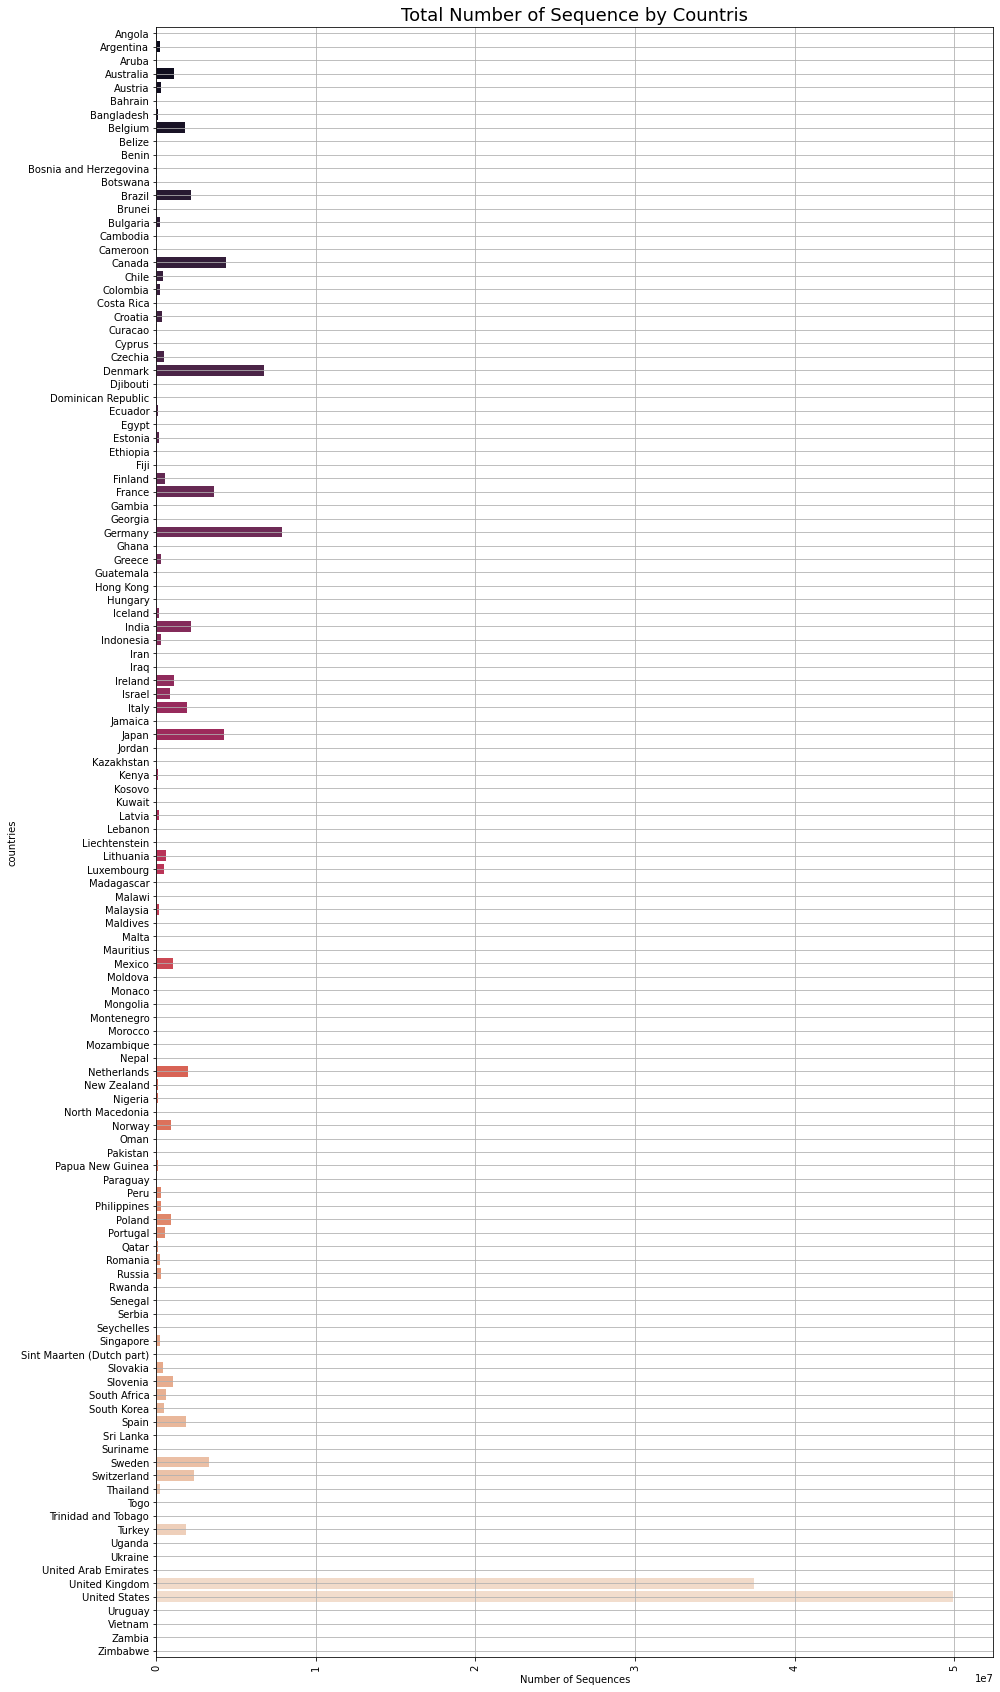

In [ ]:
f,ax=plt.subplots(figsize= (15,30))
sns.barplot(y=covid_location.location,x=covid_location["acknowledg_num_sequences_total"],palette="rocket")
plt.xticks(rotation=90)
plt.ylabel("countries")
plt.xlabel("Number of Sequences")
plt.title("Total Number of Sequence by Countris",color="black",fontsize=18)
plt.grid()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

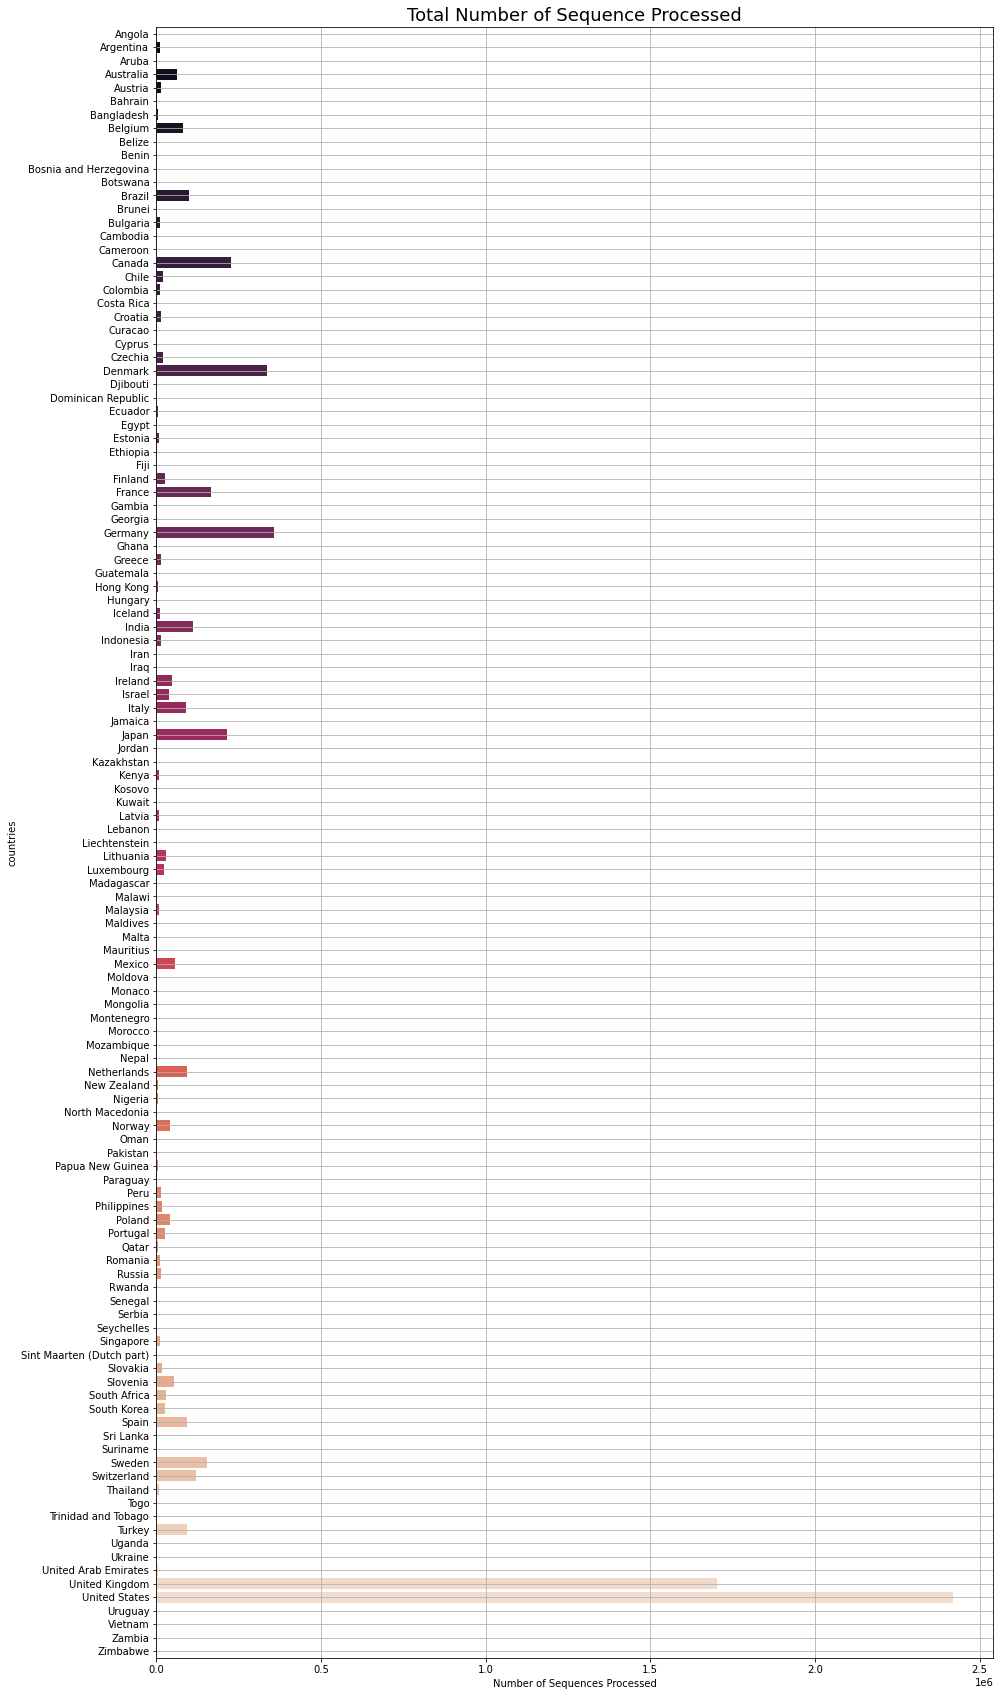

In [ ]:
plt.subplots(figsize= (15,30))
sns.barplot(y=covid_location.location,x=covid_location["num_sequences_processed"],palette="rocket")
plt.ylabel("countries")
plt.xlabel("Number of Sequences Processed")
plt.title("Total Number of Sequence Processed",color="black",fontsize=18)
plt.grid()
plt.show


In [ ]:
variants=df_covid.variant.unique()
variant_num_seq=[]
for i in variants:
  x=df_covid[df_covid.variant.values==i]
  num_seq=sum(x.num_sequences)
  variant_num_seq.append(num_seq)

variant_set=pd.DataFrame({"variant":variants,"number_of_sequence":variant_num_seq})
var_index=variant_set.number_of_sequence.sort_values(ascending=False).index.values
variant_set=variant_set.reindex(var_index)
variant_set

,variant,number_of_sequence
11,Delta,3834100
0,Alpha,1132595
23,non_who,931098
22,others,642603
5,B.1.177,170457
19,Omicron,115538
14,Gamma,115156
12,Epsilon,66127
15,Iota,42905
10,Beta,40514


Text(0.5, 1.0, 'Number of Sequence by Variant')

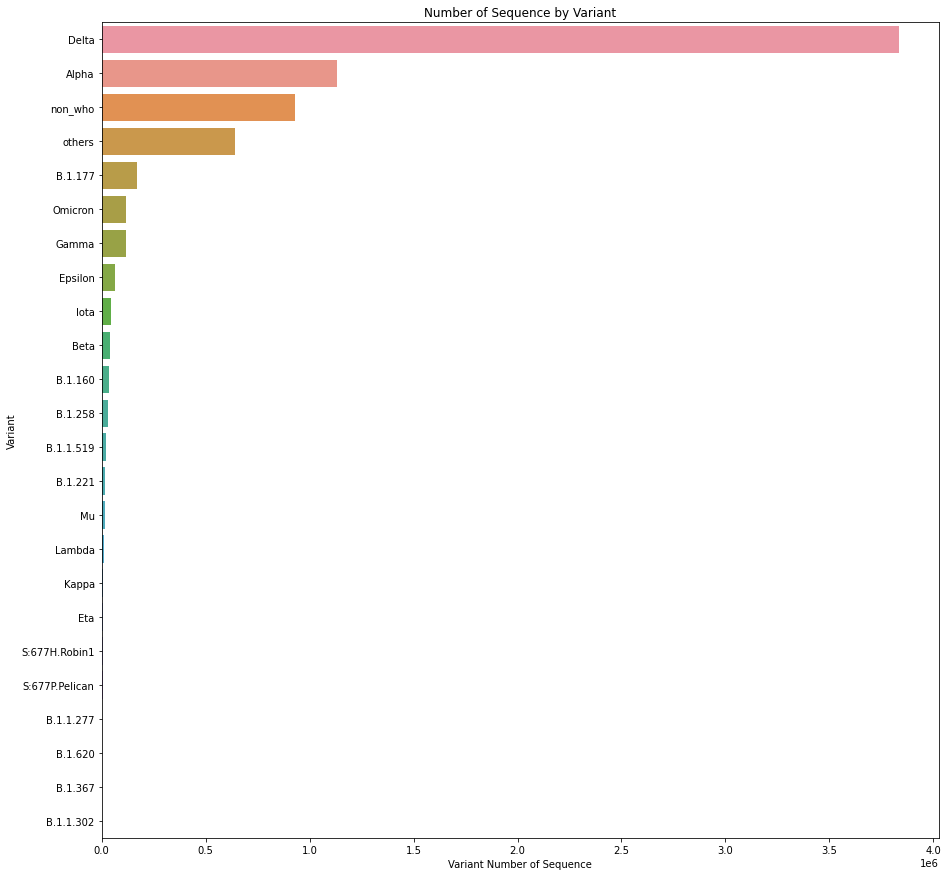

In [ ]:
plt.subplots(figsize=(15,15))
sns.barplot(y=variant_set.variant,x=variant_set.number_of_sequence)
plt.ylabel("Variant")
plt.xlabel("Variant Number of Sequence")
plt.title("Number of Sequence by Variant")

In [ ]:
#convering all the data into Pivot table to get required value against num_sequences

df_num_seq=pd.pivot_table(df_covid,'num_sequences',index=['location'],columns=['variant'],
                          aggfunc={'num_sequences':np.sum})
df_num_seq.head(5)

variant,Alpha,B.1.1.277,B.1.1.302,B.1.1.519,B.1.160,B.1.177,B.1.221,B.1.258,B.1.367,B.1.620,...,Gamma,Iota,Kappa,Lambda,Mu,Omicron,S:677H.Robin1,S:677P.Pelican,non_who,others
location,,,,,,,,,,,,,,,,,,,,,
Angola,156,0,0,0,3,4,0,1,0,2,...,1,0,6,0,0,0,0,0,270,260
Argentina,366,0,0,46,0,0,0,1,0,0,...,2859,21,0,1109,26,93,0,0,2278,2231
Aruba,551,0,0,27,0,18,2,0,0,0,...,123,102,0,2,95,0,2,0,302,253
Australia,613,0,0,6,20,41,7,15,0,0,...,8,5,156,1,1,1693,2,2,15469,15376
Austria,3563,5,0,0,349,216,24,414,1,0,...,34,2,1,0,49,34,0,0,2047,1038


In [ ]:
#** there are so many varients, but we will considere only WHO labeled varients.you can see from "https://www.who.int/activities/tracking-SARS-CoV-2-variants"
#  which is official website of WHO.These varients are alpha,Beta,Gamma,Delta and Omicron.**
 
 #due to that here drop the variants which was not labeled by WHO 


df_num_seq.drop(['B.1.1.277','B.1.1.302' ,'B.1.1.519' ,'B.1.160','B.1.177', 'B.1.221' ,'B.1.258' ,'B.1.367' ,'B.1.620'  ,'Epsilon' ,'Eta', 
                  'Iota' ,'Kappa' ,'Lambda', 'Mu' ,'S:677H.Robin1' ,'S:677P.Pelican' ,'others','non_who'],axis=1,inplace=True)
 


In [ ]:
# making new column of total cases country / loaction wise df_num_seq dataframe

sum_variant=df_num_seq["Alpha"]+df_num_seq["Beta"]+df_num_seq["Delta"]+df_num_seq["Gamma"]+df_num_seq["Omicron"]
df_num_seq["Total"]=sum_variant


In [ ]:
#sorting all the column data in descending order 

a=df_num_seq.sort_values(by = ['Alpha','Beta','Delta','Gamma','Omicron','Total'], ascending=[False,False,False,False,False,False])

In [ ]:
a.reset_index(inplace=True)

In [ ]:
a

variant,location,Alpha,Beta,Delta,Gamma,Omicron,Total
0,United Kingdom,262781,939,1085714,225,65137,1414796
1,United States,239829,3105,1327443,28733,28536,1627646
2,Germany,104138,2303,185698,858,2270,295267
3,Sweden,68608,2639,50652,184,634,122717
4,Denmark,63798,130,156694,67,4823,225512
...,...,...,...,...,...,...,...
116,Botswana,0,390,1277,0,380,2047
117,Zimbabwe,0,354,147,0,0,501
118,Brunei,0,1,318,0,8,327
119,Papua New Guinea,0,0,1487,0,0,1487


In [ ]:
map=a.iloc[0:10]
map

variant,location,Alpha,Beta,Delta,Gamma,Omicron,Total
0,United Kingdom,262781,939,1085714,225,65137,1414796
1,United States,239829,3105,1327443,28733,28536,1627646
2,Germany,104138,2303,185698,858,2270,295267
3,Sweden,68608,2639,50652,184,634,122717
4,Denmark,63798,130,156694,67,4823,225512
5,Japan,49841,101,90083,120,150,140295
6,Canada,34985,820,84643,13271,612,134331
7,France,32651,6176,93711,1095,843,134476
8,Netherlands,29670,690,40048,585,489,71482
9,Italy,26877,116,39386,2488,526,69393


In [ ]:
map1=a.iloc[-10:]
map1

variant,location,Alpha,Beta,Delta,Gamma,Omicron,Total
111,Malawi,5,377,360,0,34,776
112,Monaco,3,1,76,0,0,80
113,Mozambique,2,385,362,0,17,766
114,Nepal,2,0,343,0,3,348
115,Mauritius,1,7,143,0,6,157
116,Botswana,0,390,1277,0,380,2047
117,Zimbabwe,0,354,147,0,0,501
118,Brunei,0,1,318,0,8,327
119,Papua New Guinea,0,0,1487,0,0,1487
120,Uruguay,0,0,0,174,0,174


<function matplotlib.pyplot.show(*args, **kw)>

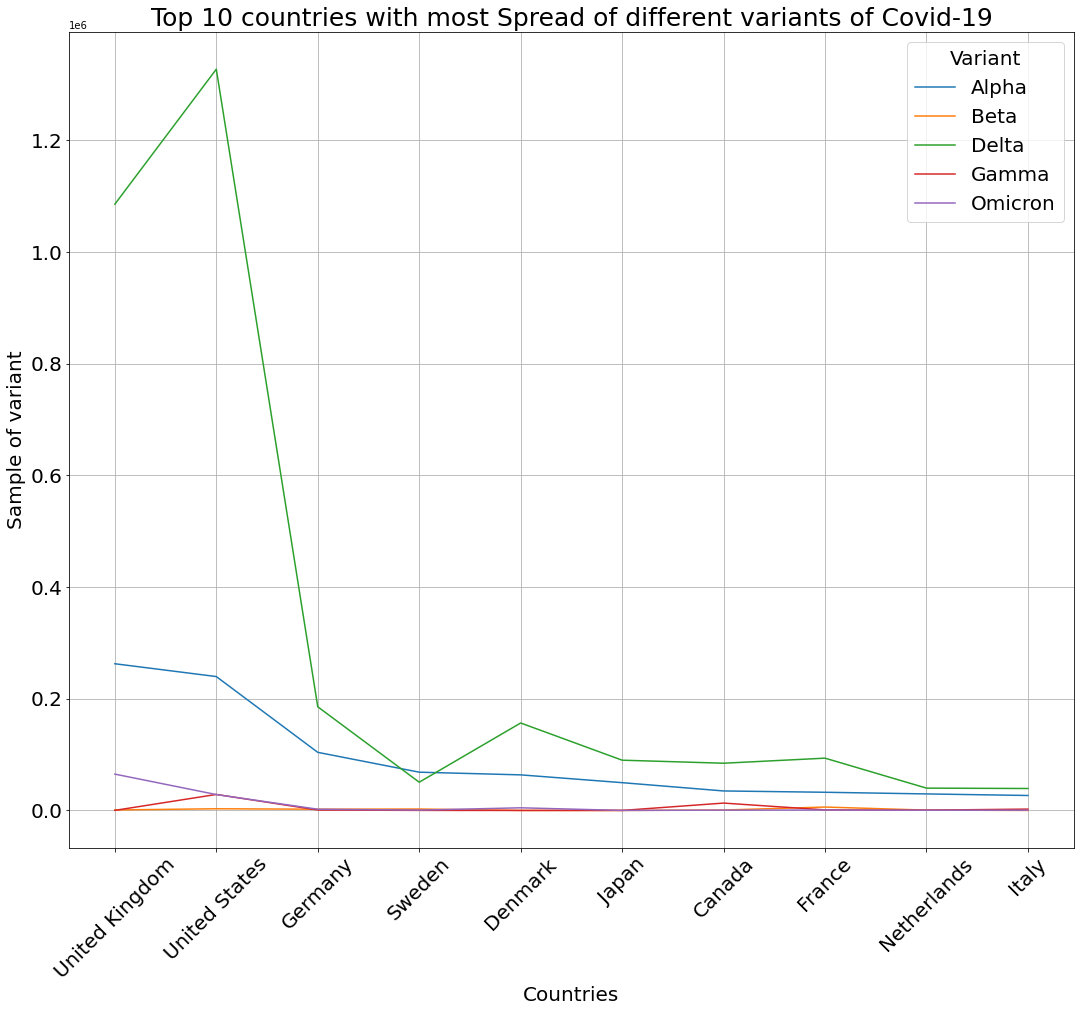

In [ ]:
f,ax=plt.subplots(figsize=(18,15))
sns.lineplot(x='location',y='Alpha',data=map)
sns.lineplot(x='location',y='Beta',data=map)
sns.lineplot(x='location',y='Delta',data=map)
sns.lineplot(x='location',y='Gamma',data=map)
sns.lineplot(x='location',y='Omicron',data=map)
plt.ylabel("Sample of variant",fontsize=20)
plt.xlabel("Countries",fontsize=20)
plt.title("Top 10 countries with most Spread of different variants of Covid-19", fontsize=25)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=['Alpha','Beta','Delta','Gamma','Omicron'],title="Variant",
           fontsize='20',title_fontsize='20')
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

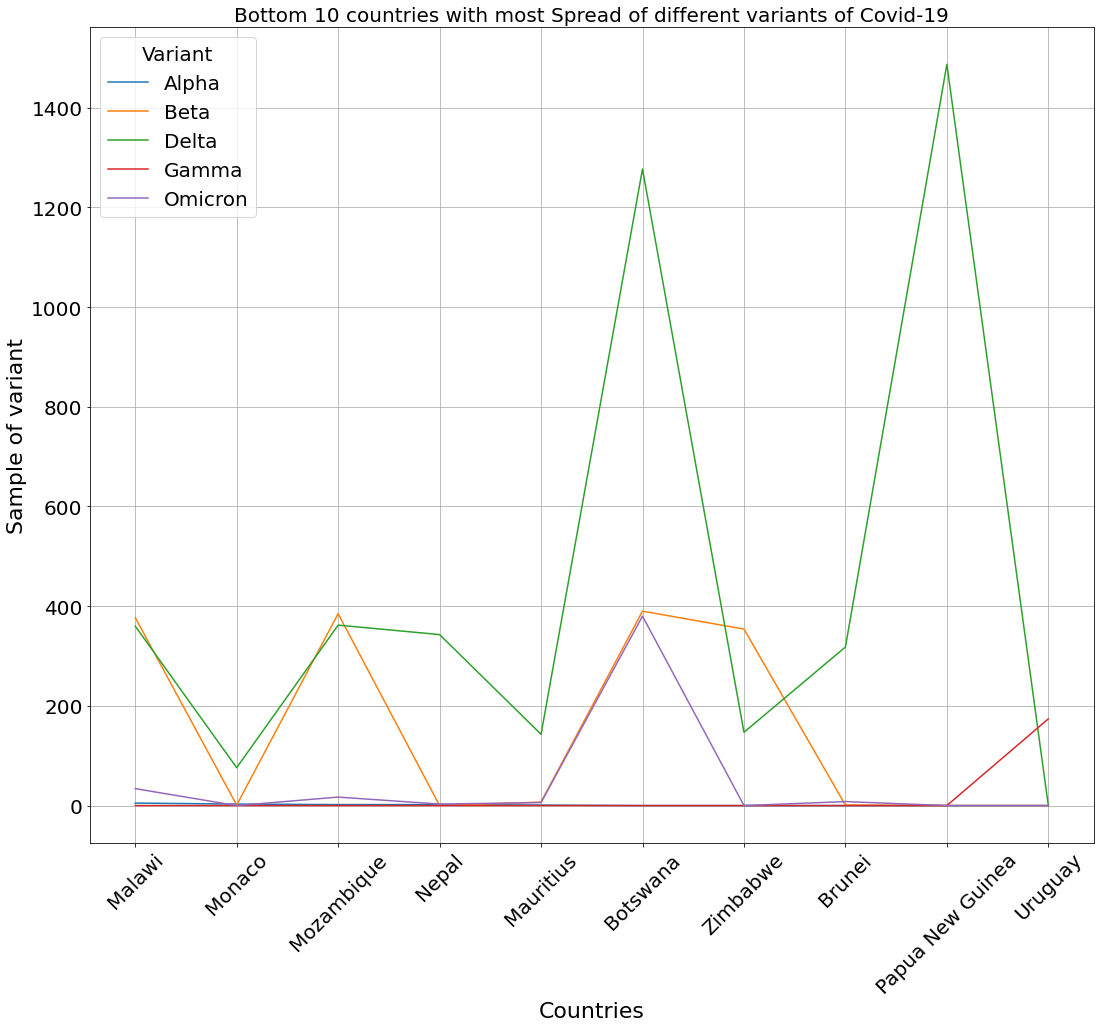

In [ ]:
f,ax=plt.subplots(figsize=(18,15))
sns.lineplot(x='location',y='Alpha',data=map1)
sns.lineplot(x='location',y='Beta',data=map1)
sns.lineplot(x='location',y='Delta',data=map1)
sns.lineplot(x='location',y='Gamma',data=map1)
sns.lineplot(x='location',y='Omicron',data=map1)
plt.ylabel("Sample of variant",fontsize=22)
plt.xlabel("Countries",fontsize=22)
plt.title("Bottom 10 countries with most Spread of different variants of Covid-19", fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=['Alpha','Beta','Delta','Gamma','Omicron'],title="Variant",
           fontsize='20',title_fontsize='20')
plt.grid()
plt.show

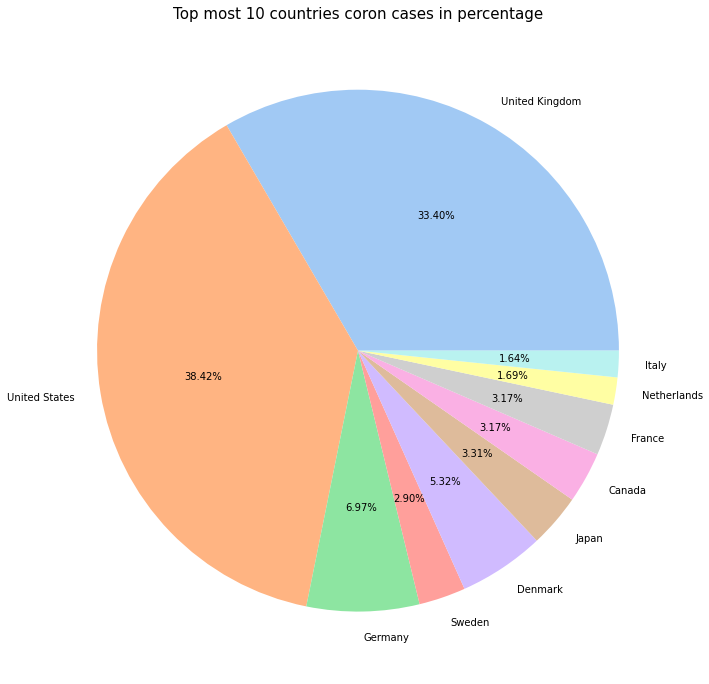

In [ ]:

plt.figure(figsize=(12,12))
colors=sns.color_palette('pastel')[0:10]
plt.pie(x=map['Total'].iloc[0:10],labels=map['location'].iloc[0:10],colors=colors,autopct='%1.2f%%')
plt.title('Top most 10 countries coron cases in percentage',fontsize=15)
plt.show()

In [ ]:
#date and cuntry  
#date and Varients

Now lets check Covid-19 spread in india against rest of the Countries by considiring WHO approval variant

In [61]:
df=df_covid
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


lets checking for the variants spread with respect to time span in world

In [81]:
#separate variants
Omicron=df[df['variant']=='Omicron']
Delta=df[df['variant']=='Delta']
Beta=df[df['variant']=='Beta']
Alpha=df[df['variant']=='Alpha']
Gamma=df[df['variant']=='Gamma']
Others=df[(df['variant']!='Omicron') & (df['variant']!='Delta') & (df['variant']!='Beta')& (df['variant']!='Alpha')& (df['variant']!='Gamma')]

In [85]:
#group in all the above data w.r.t date
omicron_data=Omicron.groupby("date").sum()
omicron_data['date']=Omicron_data.index
delta_data=Delta.groupby("date").sum()
delta_data['date']=delta_data.index
beta_data=Beta.groupby("date").sum()
beta_data['date']=beta_data.index
alpha_data=Alpha.groupby("date").sum()
alpha_data['date']=alpha_data.index
gamma_data=Gamma.groupby("date").sum()
gamma_data['date']=gamma_data.index
others_data=Others.groupby("date").sum()
others_data['date']=others_data.index

Plotting line plot variants Vs Time or Date for visualizing spread of Covid-19 in World

Text(0.5, 1.0, 'Covid-19 cases per day through out the world')

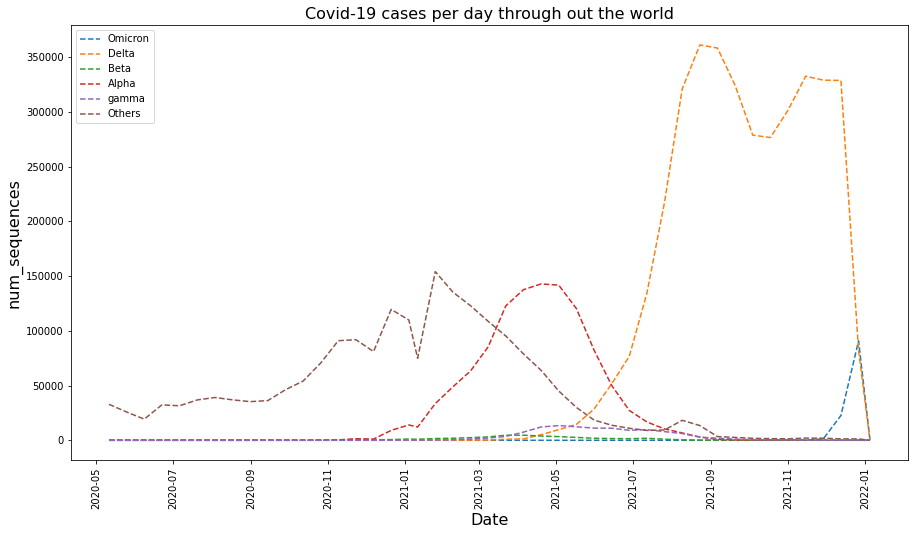

In [90]:
plt.figure(figsize=(15,8))
sns.lineplot(x=omicron_data["date"],y=omicron_data["num_sequences"],label="Omicron",linestyle="--")
sns.lineplot(x=delta_data["date"],y=delta_data["num_sequences"],label="Delta",linestyle="--")
sns.lineplot(x=beta_data["date"],y=beta_data["num_sequences"],label="Beta",linestyle="--")
sns.lineplot(x=alpha_data["date"],y=alpha_data["num_sequences"],label="Alpha",linestyle="--")
sns.lineplot(x=gamma_data["date"],y=gamma_data["num_sequences"],label="gamma",linestyle="--")
sns.lineplot(x=others_data["date"],y=others_data["num_sequences"],label="Others",linestyle="--")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=16)
plt.ylabel("num_sequences",fontsize=16)
plt.title('Covid-19 cases per day through out the world',fontsize=16)


lets check Covid-19 Spread in India

In [112]:
Omicron_ind=Omicron[Omicron['location']=='India']
Delta_ind=Delta[Delta['location']=='India']
Beta_ind=Beta[Beta['location']=='India']
Alpha_ind=Alpha[Alpha['location']=='India']
Gamma_ind=Gamma[Gamma['location']=='India']
Others_ind=Others[Others['location']=='India']

In [108]:
others_ind_data=others_ind.groupby("date").sum()
others_ind_data.head()

,num_sequences,perc_sequences,num_sequences_total
date,,,
2020-05-11,942,200.0,8949
2020-05-25,1298,200.0,12331
2020-06-08,1234,200.0,11723
2020-06-22,1532,200.0,14554
2020-07-06,552,200.0,5244


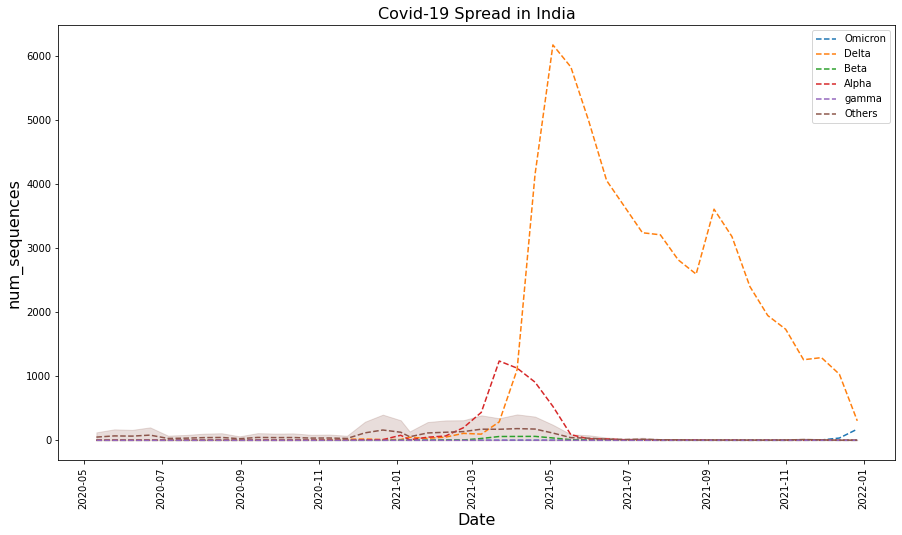

In [113]:
plt.figure(figsize=(15,8))
sns.lineplot(x=Omicron_ind["date"],y=Omicron_ind["num_sequences"],label="Omicron",linestyle="--")
sns.lineplot(x=Delta_ind["date"],y=Delta_ind["num_sequences"],label="Delta",linestyle="--")
sns.lineplot(x=Beta_ind["date"],y=Beta_ind["num_sequences"],label="Beta",linestyle="--")
sns.lineplot(x=Alpha_ind["date"],y=Alpha_ind["num_sequences"],label="Alpha",linestyle="--")
sns.lineplot(x=Gamma_ind["date"],y=Gamma_ind["num_sequences"],label="gamma",linestyle="--")
sns.lineplot(x=Others_ind["date"],y=Others_ind["num_sequences"],label="Others",linestyle="--")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=16)
plt.ylabel("num_sequences",fontsize=16)
plt.title('Covid-19 Spread in India',fontsize=16)
plt.show()


                              From Above line plot we can say that spread of Delta variant in India is maximum


<function matplotlib.pyplot.show(*args, **kw)>

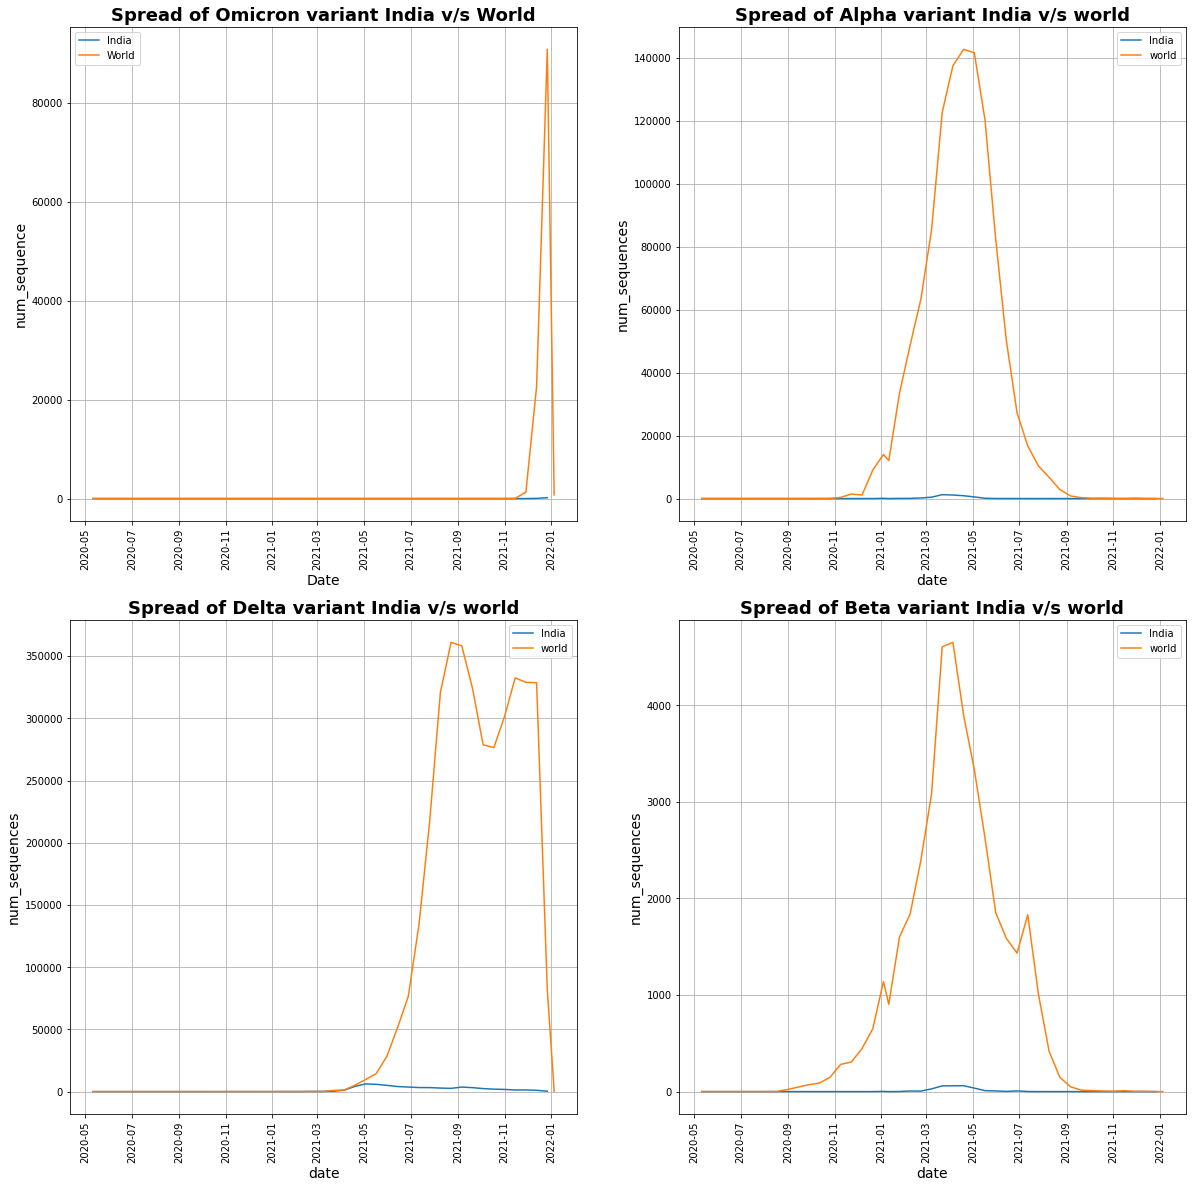

In [122]:
# lets now comparing each variant spread India Vs World
plt.figure(figsize=(20,20))
plt.subplot(2,2,1).set_title("Spread of Omicron variant India v/s World", fontdict={'fontsize':18,'fontweight':'bold'})
sns.lineplot(x=Omicron_ind['date'],y=Omicron_ind['num_sequences'],label='India')
sns.lineplot(x=omicron_data['date'],y=omicron_data['num_sequences'],label='World')
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Date',fontsize=14)
plt.ylabel('num_sequence',fontsize=14)

plt.subplot(2,2,2).set_title('Spread of Alpha variant India v/s world',fontdict={'fontsize':18,'fontweight':'bold'})
sns.lineplot(x=Alpha_ind['date'],y=Alpha_ind['num_sequences'],label='India')
sns.lineplot(x=alpha_data['date'],y=alpha_data['num_sequences'],label='world')

plt.xticks(rotation=90)
plt.xlabel('date',fontsize=14)
plt.ylabel('num_sequences',fontsize=14)
plt.grid()

plt.subplot(2,2,3).set_title('Spread of Delta variant India v/s world',fontdict={'fontsize':18,'fontweight':'bold'})
sns.lineplot(x=Delta_ind['date'],y=Delta_ind['num_sequences'],label='India')
sns.lineplot(x=delta_data['date'],y=delta_data['num_sequences'],label='world')
plt.xticks(rotation=90)
plt.xlabel('date',fontsize=14)
plt.ylabel('num_sequences',fontsize=14)
plt.grid()

plt.subplot(2,2,4).set_title('Spread of Beta variant India v/s world',fontdict={'fontsize':18,'fontweight':'bold'})
sns.lineplot(x=Beta_ind['date'],y=Beta_ind['num_sequences'],label='India')
sns.lineplot(x=beta_data['date'],y=beta_data['num_sequences'],label='world')
plt.xticks(rotation=90)
plt.xlabel('date',fontsize=14)
plt.ylabel('num_sequences',fontsize=14)
plt.grid()
plt.show

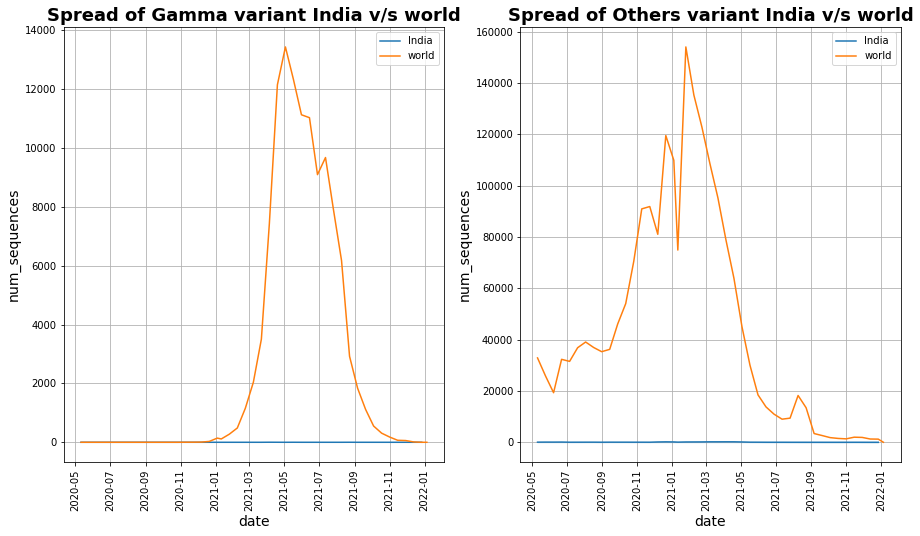

In [128]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1).set_title('Spread of Gamma variant India v/s world',fontdict={'fontsize':18,'fontweight':'bold'})
sns.lineplot(x=Gamma_ind['date'],y=Gamma_ind['num_sequences'],label='India')
sns.lineplot(x=gamma_data['date'],y=gamma_data['num_sequences'],label='world')
plt.xticks(rotation=90)
plt.xlabel('date',fontsize=14)
plt.ylabel('num_sequences',fontsize=14)
plt.grid()

plt.subplot(1,2,2).set_title('Spread of Others variant India v/s world',fontdict={'fontsize':18,'fontweight':'bold'})
sns.lineplot(x=Others_ind['date'],y=Others_ind['num_sequences'],label='India')
sns.lineplot(x=others_data['date'],y=others_data['num_sequences'],label='world')
plt.xticks(rotation=90)
plt.xlabel('date',fontsize=14)
plt.ylabel('num_sequences',fontsize=14)
plt.grid()
plt.show()

Lets try the same with logrithimic line plot-A logarthmic scale chart is a chart where the value between two points on the y-axis changes with a distinct pattern. The pattern is based on the following equation y=log b(10),where y is the power (exponent) that b is raised to in order to get x, in other words, the logarthimic is the inverse fuction to exponentiation 

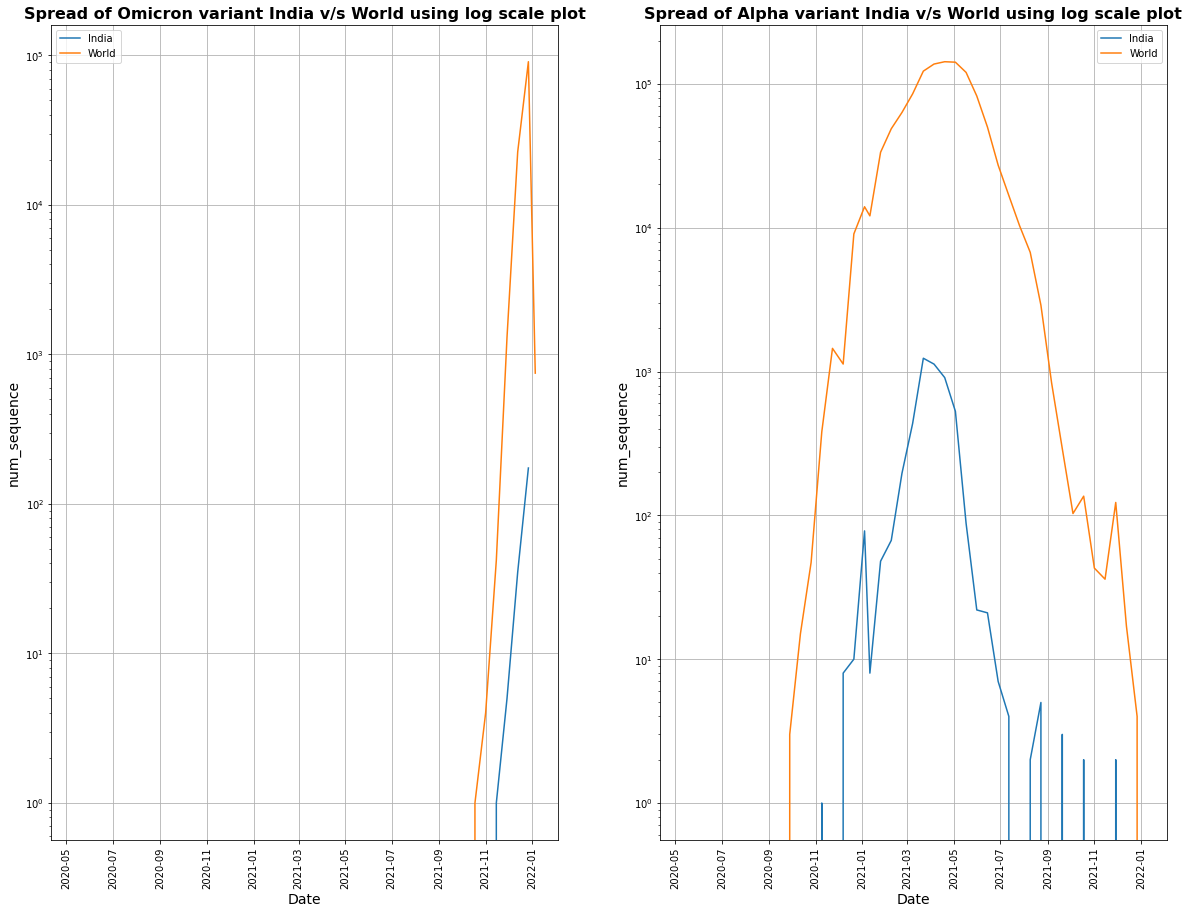

In [131]:
# Lets now comparing each variant spread India Vs World

plt.figure(figsize=(20,15))
plt.subplot(1,2,1).set_title("Spread of Omicron variant India v/s World using log scale plot",fontdict={'fontsize':16,'fontweight':'bold'})
ax=sns.lineplot(x=Omicron_ind['date'],y=Omicron_ind['num_sequences'],label='India')
bx=sns.lineplot(x=omicron_data['date'],y=omicron_data['num_sequences'],label='World')
plt.xticks(rotation=90)
plt.grid()
ax.set(yscale='log')
plt.xlabel('Date',fontsize=14)
plt.ylabel('num_sequence',fontsize=14)

plt.subplot(1,2,2).set_title("Spread of Alpha variant India v/s World using log scale plot",fontdict={'fontsize':16,'fontweight':'bold'})
cx=sns.lineplot(x=Alpha_ind['date'],y=Alpha_ind['num_sequences'],label='India')
dx=sns.lineplot(x=alpha_data['date'],y=alpha_data['num_sequences'],label='World')
plt.xticks(rotation=90)
plt.grid()
cx.set(yscale='log')
plt.xlabel('Date',fontsize=14)
plt.ylabel('num_sequence',fontsize=14)
plt.show()

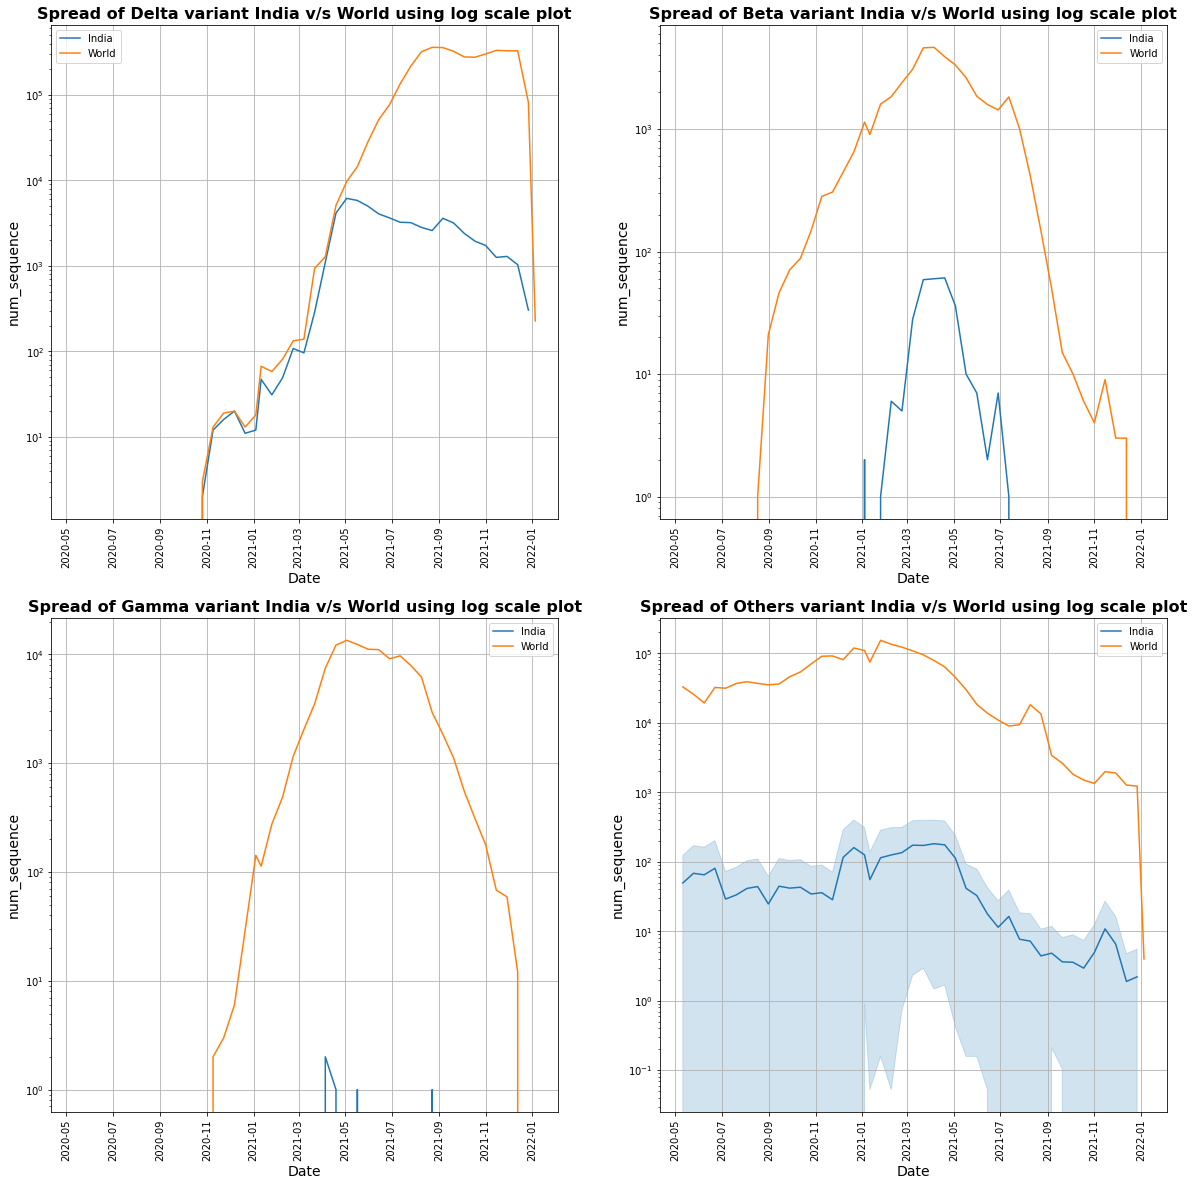

In [133]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1).set_title("Spread of Delta variant India v/s World using log scale plot",fontdict={'fontsize':16,'fontweight':'bold'})
ex=sns.lineplot(x=Delta_ind['date'],y=Delta_ind['num_sequences'],label='India')
fx=sns.lineplot(x=delta_data['date'],y=delta_data['num_sequences'],label='World')
plt.xticks(rotation=90)
plt.grid()
ex.set(yscale='log')
plt.xlabel('Date',fontsize=14)
plt.ylabel('num_sequence',fontsize=14)

plt.subplot(2,2,2).set_title("Spread of Beta variant India v/s World using log scale plot",fontdict={'fontsize':16,'fontweight':'bold'})
gx=sns.lineplot(x=Beta_ind['date'],y=Beta_ind['num_sequences'],label='India')
hx=sns.lineplot(x=beta_data['date'],y=beta_data['num_sequences'],label='World')
plt.xticks(rotation=90)
plt.grid()
gx.set(yscale='log')
plt.xlabel('Date',fontsize=14)
plt.ylabel('num_sequence',fontsize=14)

plt.subplot(2,2,3).set_title("Spread of Gamma variant India v/s World using log scale plot",fontdict={'fontsize':16,'fontweight':'bold'})
ix=sns.lineplot(x=Gamma_ind['date'],y=Gamma_ind['num_sequences'],label='India')
jx=sns.lineplot(x=gamma_data['date'],y=gamma_data['num_sequences'],label='World')
plt.xticks(rotation=90)
plt.grid()
ix.set(yscale='log')
plt.xlabel('Date',fontsize=14)
plt.ylabel('num_sequence',fontsize=14)

plt.subplot(2,2,4).set_title("Spread of Others variant India v/s World using log scale plot",fontdict={'fontsize':16,'fontweight':'bold'})
kx=sns.lineplot(x=Others_ind['date'],y=Others_ind['num_sequences'],label='India')
lx=sns.lineplot(x=others_data['date'],y=others_data['num_sequences'],label='World')
plt.xticks(rotation=90)
plt.grid()
kx.set(yscale='log')
plt.xlabel('Date',fontsize=14)
plt.ylabel('num_sequence',fontsize=14)
plt.show()


**Conclusion**:- From above all the data reading and ploting the data with respected to corresponding sequences here we can conclude following-


1)The data set is for 121 country and in overall world there are 24 types of variant found which cause responsible for the Covid -19 infction.
2)Alpha,Beta,Gamma,Delta and Omicron only these type of variants are labeled by "WHO"
3)First case registered in world as per Data set on 2020-05-11 at Argetina variant is Alpha and Last case registered in world as per data set 2022-01-05 at Bangladesh Variant is Alpha.
4)Delta variant is Highest spread in the Wolrd
5)Max Alpha variant spread found in United Kingdom is 2,62,781 cases
6)Max Beta Variant spread found in South Africa is 7,489 cases 
7)Max Delta variant spread found in United States is 13,27,443 cases
8)Max Gamma variant spread found in Brazile is 47,252 cases
9)Max Omicron variant spread found in United Kingdom is 65,137 cases
10)We heard about china is also affected by coron pendamic but we didn't found data of china in this dats set.